<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/show_me_the_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  59 of 59 completed


cleaning  000001.SS
cleaning  ^BSESN
cleaning  ^DJI
cleaning  ^FTSE
cleaning  ^GSPC
cleaning  ^HSI
cleaning  ^IXIC
cleaning  ^N225
cleaning  ^TWII
cleaning  CADUSD=X
cleaning  DX-Y.NYB
cleaning  EURUSD=X
cleaning  GBPUSD=X
cleaning  ZB=F
cleaning  ZF=F
cleaning  ZN=F
cleaning  ZT=F
cleaning  CNYUSD=X
cleaning  HKDUSD=X
cleaning  JPYUSD=X
cleaning  KRWUSD=X
cleaning  TWDUSD=X
cleaning  AUDUSD=X
cleaning  IDRUSD=X
cleaning  ILSUSD=X
cleaning  INRUSD=X
cleaning  MYRUSD=X
cleaning  NZDUSD=X
cleaning  PHPUSD=X
cleaning  SGDUSD=X
cleaning  THBUSD=X
cleaning  BNB-USD
cleaning  BTC-USD
cleaning  DOGE-USD
cleaning  ETC-USD
cleaning  ETH-USD
cleaning  LTC-USD
cleaning  NEO-USD
cleaning  SOL1-USD
cleaning  XLM-USD
cleaning  XRP-USD
cleaning  BZ=F
cleaning  CL=F
cleaning  GC=F
cleaning  PL=F
cleaning  SI=F
chart saved :  ./worldassets.jpg


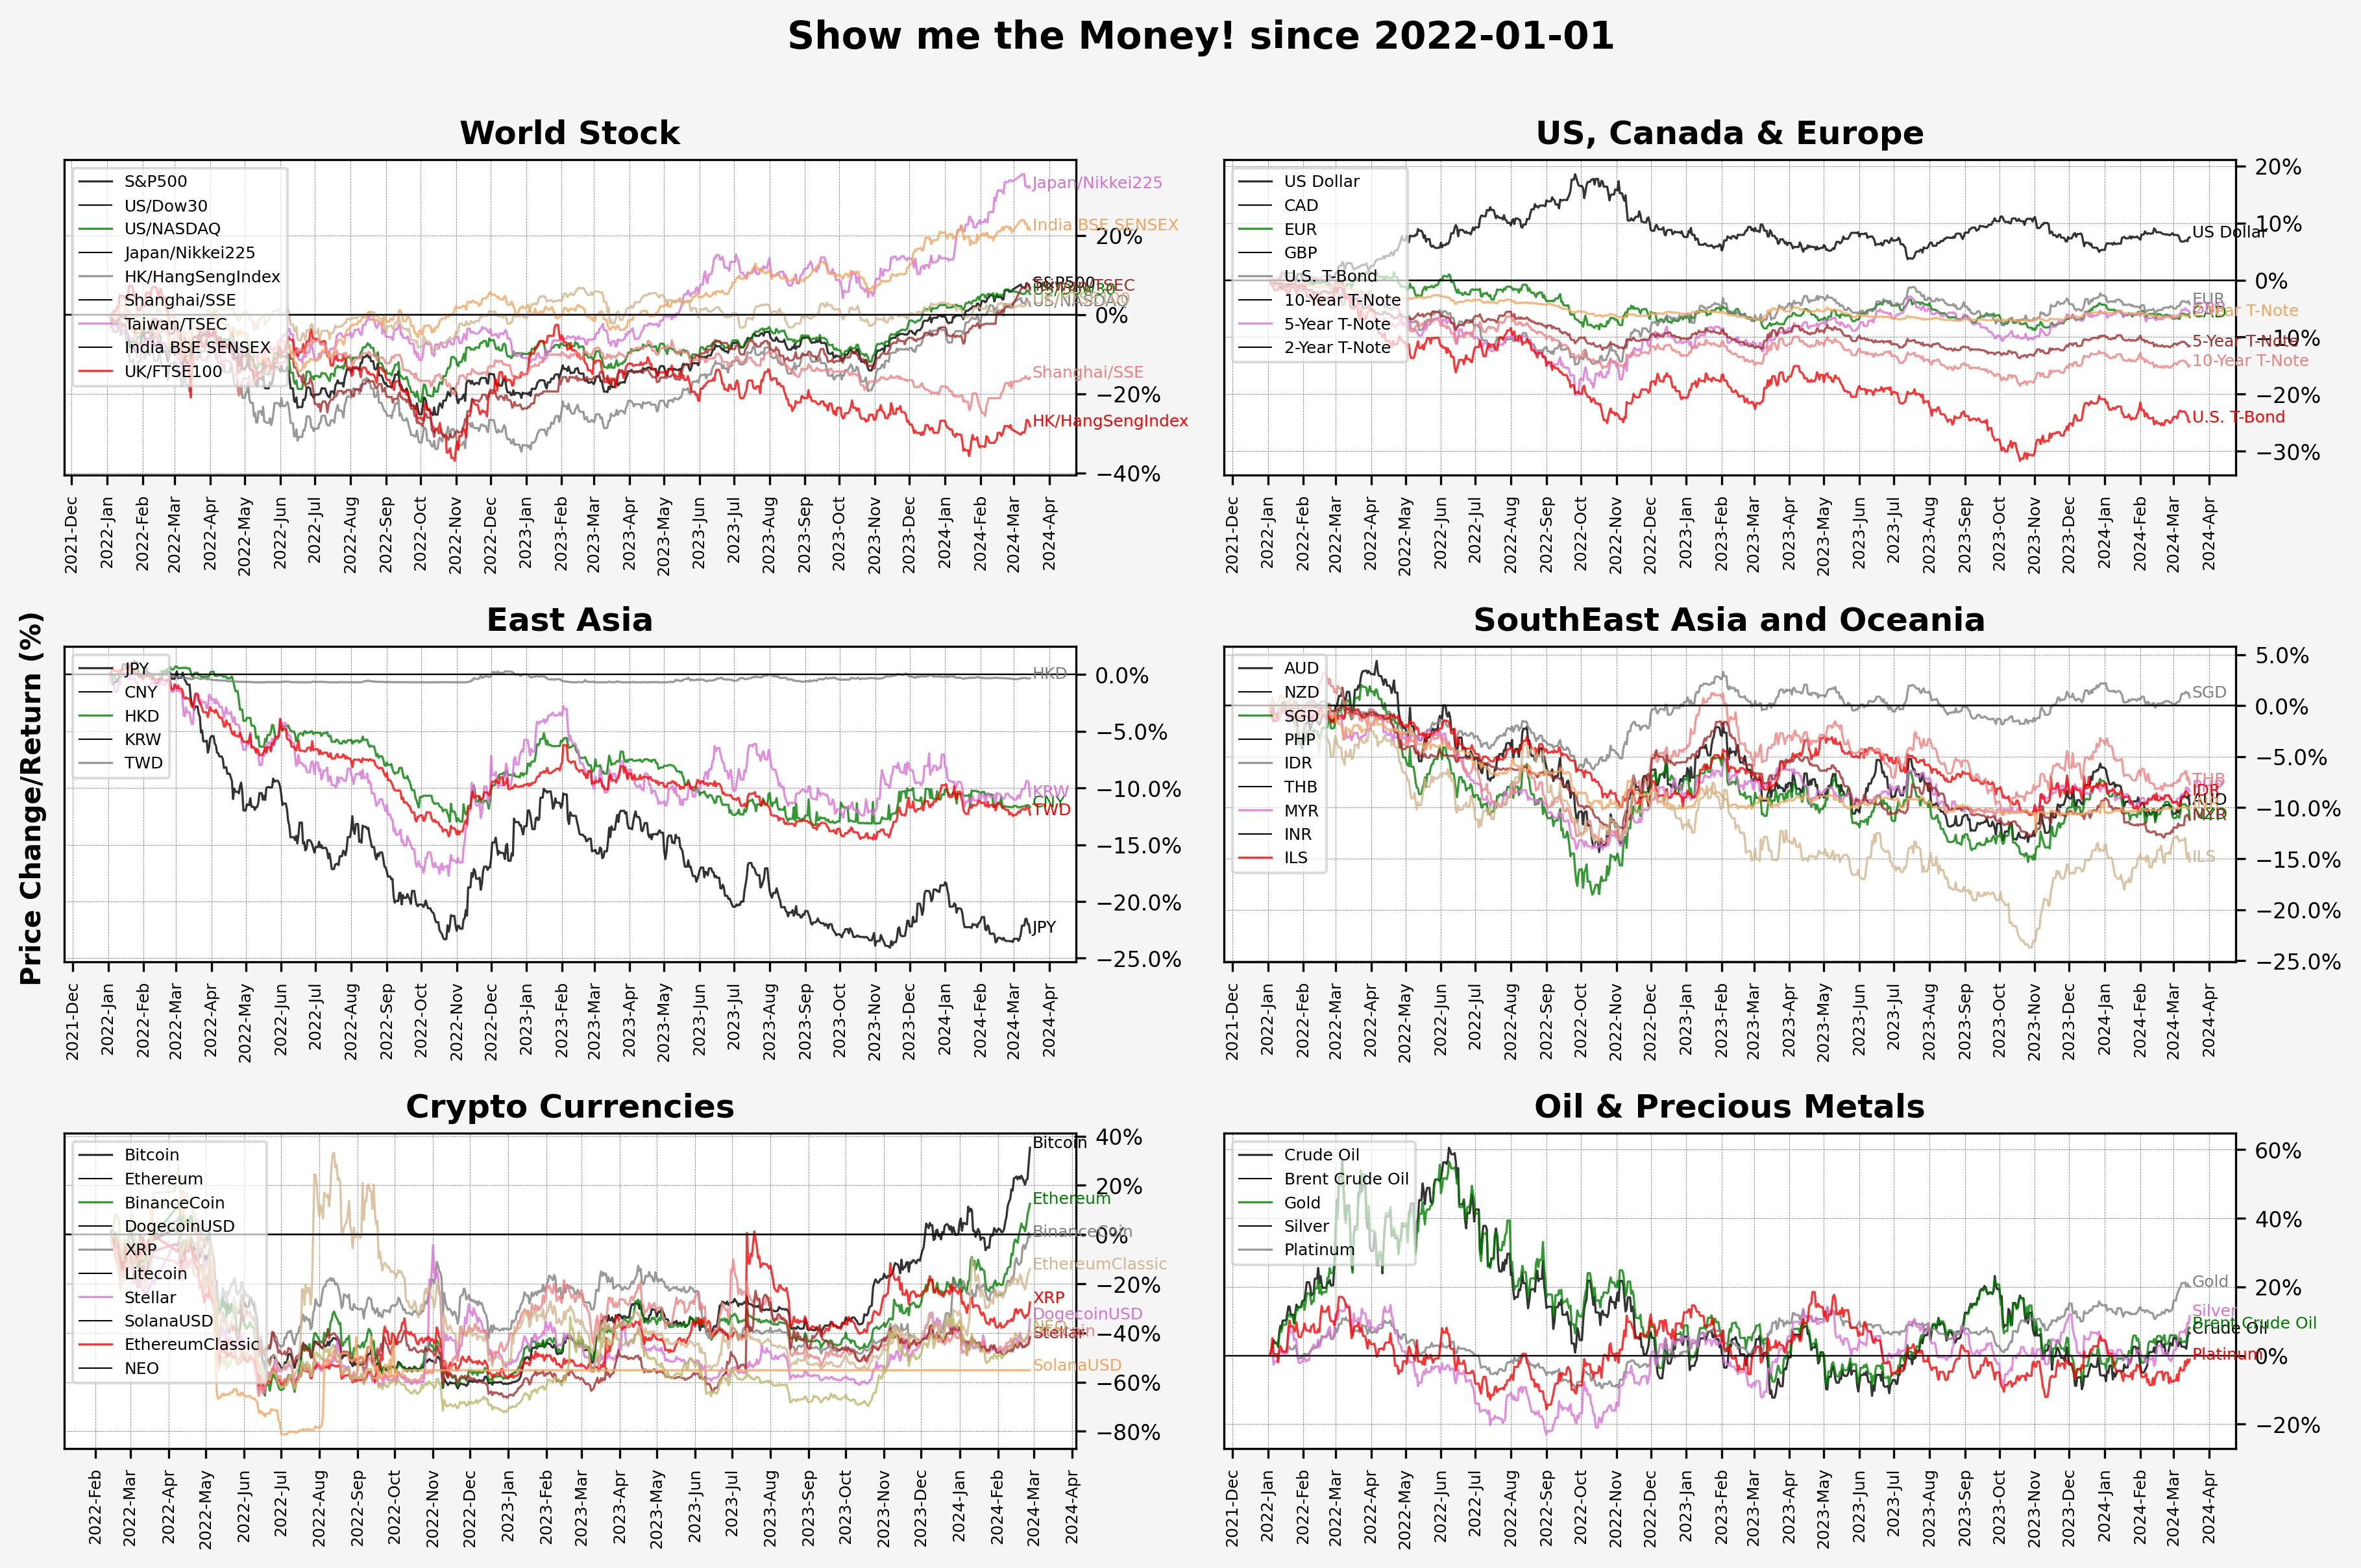

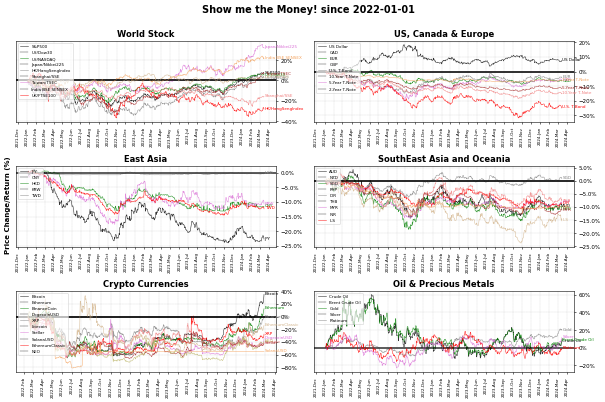

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 28 2024
article: https://medium.com/@michael.wai/run-my-python-code-and-i-can-show-you-the-money-7c948f9f31f4
@author: http://medium.com/@michael.wai
"""
import traceback
import pandas as pd # Dataframe
import yfinance as yf # stock data download
import matplotlib.pyplot as plt # chart plotting
import matplotlib.dates as mdates # axis formatting
import matplotlib.ticker as mtick  # grid beautifying

import numpy as np # number and nan handling
from datetime import date, timedelta, datetime # date operation handling

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

def show_me_the_money(
        startdate, # start date in '2024-02-29' format
        filename, # filename in e.g. 'currencychart.jpg' format
):

    # 1. Plan the Plot

    # assign different ticker in different segment
    ticker_group_tbl = {
        'World Stock': ['^GSPC', '^DJI', '^IXIC', '^N225', '^HSI', '000001.SS', '^TWII', '^BSESN','^FTSE'],
        'US, Canada & Europe': ['DX-Y.NYB', 'CADUSD=X', 'EURUSD=X', 'GBPUSD=X', 'ZB=F', 'ZN=F', 'ZF=F', 'ZT=F'],
        'East Asia': ['JPYUSD=X', 'CNYUSD=X', 'HKDUSD=X', 'KRWUSD=X', 'TWDUSD=X'],
        'SouthEast Asia and Oceania': ['AUDUSD=X', 'NZDUSD=X', 'SGDUSD=X', 'PHPUSD=X', 'IDRUSD=X', 'THBUSD=X', 'MYRUSD=X', 'INRUSD=X', 'ILSUSD=X'],
        'Crypto Currencies': ['BTC-USD', 'ETH-USD', 'BNB-USD', 'DOGE-USD', 'XRP-USD', 'LTC-USD', 'XLM-USD','SOL1-USD', 'ETC-USD', 'NEO-USD'],
        'Oil & Precious Metals': ['CL=F', 'BZ=F', 'GC=F', 'SI=F', 'PL=F', ]

    }

    # list out the YahooFinance ticker and it's label
    all_tickers = {

        # World Stock Index
        '^GSPC': 'S&P500',
        '^DJI': 'US/Dow30',
        '^IXIC': 'US/NASDAQ',
        '^N225': 'Japan/Nikkei225',
        '^HSI': 'HK/HangSengIndex',
        '000001.SS': 'Shanghai/SSE',
        '^TWII':'Taiwan/TSEC',
        '^BSESN': 'India BSE SENSEX',
        '^FTSE': 'UK/FTSE100',

        # HERE ARE THE CURRENCIES
        'DX-Y.NYB': 'US Dollar',
        'ZB=F': 'U.S. T-Bond',
        'ZN=F': '10-Year T-Note',
        'ZF=F': '5-Year T-Note',
        'ZT=F': '2-Year T-Note',
        'CADUSD=X': 'CAD',
        'EURUSD=X': 'EUR',
        'JPYUSD=X': 'JPY',
        'GBPUSD=X': 'GBP',
        'AUDUSD=X': 'AUD',
        'NZDUSD=X': 'NZD',
        'CNYUSD=X': 'CNY',
        'TWDUSD=X': 'TWD',
        'HKDUSD=X': 'HKD',
        'KRWUSD=X': 'KRW',
        'SGDUSD=X': 'SGD',
        'INRUSD=X': 'INR',
        'MXNUSD=X': 'MXN',
        'PHPUSD=X': 'PHP',
        'IDRUSD=X': 'IDR',
        'THBUSD=X': 'THB',
        'MYRUSD=X': 'MYR',
        'ZARUSD=X': 'ZAR',
        'RUBUSD=X': 'RUB',
        'ILSUSD=X': 'ILS',

        # HERE ARE THE CRYPTOS
        'BTC-USD': 'Bitcoin',
        'ETH-USD': 'Ethereum',
        'BNB-USD': 'BinanceCoin',
        'DOGE-USD':'DogecoinUSD',
        'ADA-USD':'CardanoUSD',
        'XRP-USD': 'XRP',
        'LTC-USD': 'Litecoin',
        'LINK-USD':'ChainlinkUSD',
        'XLM-USD': 'Stellar',
        'VET-USD':'VeChainUSD',
        'SOL1-USD':'SolanaUSD',
        'ETC-USD': 'EthereumClassic',
        'EOS-USD':'EOSUSD',
        'HEX-USD':'HEXUSD',
        'THETA-USD':'THETAUSD',
        'TRX-USD':'TRONUSD',
        'FIL-USD':'FilecoinFuturesUSD',
        'AAVE-USD':'AaveUSD',
        'XMR-USD':'MoneroUSD',
        'NEO-USD': 'NEO',

        # Commodity
        'CL=F': 'Crude Oil',
        'BZ=F': 'Brent Crude Oil',
        'GC=F': 'Gold',
        'SI=F': 'Silver',
        'PL=F': 'Platinum',
    }


    pagoda = ["black", "green", "grey", "orchid",
              "red", "lightcoral", "brown", "sandybrown", "tan",
              "darkkhaki", "olivedrab", "lightseagreen",
              "steelblue", "dodgerblue", "slategray",
              "blue", "darkorchid", "viloet", "deeppink", "hotpink"]

    # define the figure layout as 3 row x 2 column subplots
    fig, axes = plt.subplots(3, 2, figsize=(12, 8), dpi=50, sharex=False)

    tickerList = pd.DataFrame(all_tickers.items(), columns=['Symbol', 'Name']) # convert all_tickers dict to dataframe

    alltickerDf = pd.DataFrame()
    alltickerDf = yf.download(tickerList['Symbol'].to_list(), start=startdate) #download all symbols at once
    alltickerDf = alltickerDf.ffill()
    set(alltickerDf.columns.get_level_values(0))
    alltickerDf = alltickerDf['Close']


    def locateGroup(ticker):
        for i in ticker_group_tbl.keys():
            if ticker in ticker_group_tbl[i]:
                return i

    def remove_outliner(df, columns, threshold=3): #sometimes we have data which is outliner from Yahoo we need to clean
        df_cleaned = df.copy()
        # Iterate over each column
        for col in columns:
            if col in df_cleaned.columns:
                print('cleaning ', col)
                # Calculate Z-score for each value in the column
                z_scores = np.abs(
                    (df_cleaned[col] - df_cleaned[col].mean()) / df_cleaned[col].std())

                # Find indices of outliers based on Z-score exceeding threshold
                outlier_indices = z_scores > threshold

                # Replace outliers with NaNs
                df_cleaned.loc[outlier_indices , col] = np.nan

                # Drop rows containing NaNs
                df_cleaned = df_cleaned.dropna()

        return df_cleaned

    # 2. Prepare the data
    for i, t in enumerate(ticker_group_tbl.keys()):
        groupDf=(alltickerDf[ticker_group_tbl[t]])
        groupDf = remove_outliner(groupDf, alltickerDf.columns)

        stock_list = groupDf.stack().to_frame('Close').reset_index()
        stock_list.rename(columns={ stock_list.columns[1]: "ticker" }, inplace = True)
        stock_list.set_index('Date', inplace=True)
        stock_list['region'] = stock_list.ticker.apply(lambda x: locateGroup(x))

        # find the date which has all symbol data
        df = stock_list.groupby('Date')['ticker'].apply(list).reset_index(name='ticker')
        maxlen = max(df.ticker.str.len(),default=0)
        df = df.loc[df.ticker.str.len() == maxlen]
        if df.empty:
            print('No common start date for comparison, please retry data download.')
            return
        common_mindate = df['Date'].iloc[0]
        begRef = groupDf.loc[groupDf.index == common_mindate]

        # consolidate the data based on common start date
        groupDf = groupDf[groupDf.index>=begRef.index[0]] #Only intereste in start date where every ticker has data
        groupDf = groupDf.apply(lambda x: x/x.iloc[0]-1)


        # 3. Plot the Plan: Iterate for each region
        ax = axes[int(i/2), int(i % 2)]

        for j, symbol in enumerate(ticker_group_tbl[t]):
            # Iterate and plot for each stock index in this region
            ax.plot(groupDf.index, groupDf[symbol], marker='',
                    alpha=0.8, linewidth=0.8, color=pagoda[j], label=all_tickers[symbol])
            ax.text(groupDf.index[-1]+timedelta(days=2),
                    groupDf[symbol].iloc[-1], all_tickers[symbol], color=pagoda[j], fontsize=6)

            # set grid for easy reading
            ax.xaxis.grid(color='grey', linestyle='--', linewidth=0.2)
            ax.yaxis.grid(color='grey', linestyle='--', linewidth=0.2)

            # set 0% axis
            ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

            # format xaxis depeds on length of data
            from dateutil.relativedelta import relativedelta
            diff = relativedelta(date.today(), datetime.strptime(startdate, '%Y-%m-%d'))
            diff_month=diff.years*12+diff.months
            if diff_month <= 36:
                ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
                ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))
            else:
                ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
                ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

            # format yaxis as % and right aligned
            ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
            ax.yaxis.tick_right()

            ax.xaxis.set_tick_params(labelsize=6, rotation=90)
            ax.yaxis.set_tick_params(labelsize=8)

            # set subplot title
            ax.legend(labels=[all_tickers[x] for x  in ticker_group_tbl[t]], loc='upper left',
                  ncol=1, fontsize=6, framealpha=0.7, facecolor='white', frameon=True)
            ax.set_title(t, fontweight='bold')

    # 4. Save the chart
    plt.rcParams['savefig.facecolor'] = 'whitesmoke'
    fig.text(0, 0.5, "Price Change/Return (%)", ha="center",
             va="center", rotation=90, fontweight="bold")
    fig.suptitle("Show me the Money! since "+startdate, fontweight="bold", y=1, fontsize=14)

    fig.tight_layout()
    print ('chart saved : ',filename)
    fig.savefig(filename, dpi=300, bbox_inches='tight')

    return True


show_me_the_money(
        startdate='2022-01-01',
        filename='./worldassets.jpg',
)

from IPython.display import Image, display

# Display the image in the notebook with a specific width (or height)
display(Image(filename='./worldassets.jpg', width=4000))  # Adjust width as needed

# Increase figure size
#fig, axes = plt.subplots(3, 2, figsize=(180, 120), dpi=350, sharex=False)  # Increased from (12, 8) to (18, 12)

# Later when saving, you could also optionally increase the DPI for a more detailed image (if needed)
#fig.savefig(filename, dpi=300, bbox_inches='tight')  # DPI is already set to 300, adjust if more detail is needed


# New section

Code from article: https://medium.com/tech-talk-tank/run-my-python-code-and-i-can-show-you-the-money-7c948f9f31f4